In [1]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import statsmodels.stats.api as sms
import scipy.stats as st

In [30]:
nobel = pd.read_csv("-696365246.csv")
nobel.head(5)
nobel.describe()

,Year,Laureate ID
count,969.000000,969.000000
mean,1970.287926,470.152735
std,32.937498,274.586623
min,1901.000000,1.000000
25%,1947.000000,230.000000
50%,1976.000000,462.000000
75%,1999.000000,718.000000
max,2016.000000,937.000000


In [8]:
nobel.loc[nobel['Year'] == 1945]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
224,1945,Chemistry,The Nobel Prize in Chemistry 1945,"""for his research and inventions in agricultur...",1-Jan,203,Individual,Artturi Ilmari Virtanen,1895-01-15,Helsinki,Russian Empire (Finland),Male,University of Helsinki,Helsinki,Finland,11/11/1973,Helsinki,Finland
225,1945,Literature,The Nobel Prize in Literature 1945,"""for her lyric poetry which, inspired by power...",1-Jan,615,Individual,Gabriela Mistral,1889-04-07,Vicuña,Chile,Female,NaN,NaN,NaN,1/10/1957,"Hempstead, NY",United States of America
226,1945,Medicine,The Nobel Prize in Physiology or Medicine 1945,"""for the discovery of penicillin and its curat...",3-Jan,339,Individual,Sir Alexander Fleming,1881-08-06,Lochfield,Scotland,Male,London University,London,United Kingdom,3/11/1955,London,United Kingdom
227,1945,Medicine,The Nobel Prize in Physiology or Medicine 1945,"""for the discovery of penicillin and its curat...",3-Jan,340,Individual,Ernst Boris Chain,6/19/1906,Berlin,Germany,Male,University of Oxford,Oxford,United Kingdom,8/12/1979,Mulrany,Ireland
228,1945,Medicine,The Nobel Prize in Physiology or Medicine 1945,"""for the discovery of penicillin and its curat...",3-Jan,341,Individual,Sir Howard Walter Florey,1898-09-24,Adelaide,Australia,Male,University of Oxford,Oxford,United Kingdom,2/21/1968,Oxford,United Kingdom
229,1945,Peace,The Nobel Peace Prize 1945,NaN,1-Jan,505,Individual,Cordell Hull,1871-10-02,"Olympus, TN",United States of America,Male,NaN,NaN,NaN,7/23/1955,"Bethesda, MD",United States of America
230,1945,Physics,The Nobel Prize in Physics 1945,"""for the discovery of the Exclusion Principle,...",1-Jan,50,Individual,Wolfgang Pauli,4/25/1900,Vienna,Austria,Male,Princeton University,"Princeton, NJ",United States of America,12/15/1958,Zurich,Switzerland


In [9]:
#delete duplicate rows (same Laureate ID and Prize, different universities)
nobel = nobel.drop_duplicates(subset=('Year','Laureate ID'), keep='first')

In [10]:
#Check for Nan
nobel.isna().any()

Year                    False
Category                False
Prize                   False
Motivation               True
Prize Share             False
Laureate ID             False
Laureate Type           False
Full Name               False
Birth Date               True
Birth City               True
Birth Country            True
Sex                      True
Organization Name        True
Organization City        True
Organization Country     True
Death Date               True
Death City               True
Death Country            True
dtype: bool

In [15]:
sex = nobel.groupby(['Year','Sex']).size().reset_index()
sex.columns = ['Year','Sex','Count']
sex.head()

,Year,Sex,Count
0,1901,Male,6
1,1902,Male,7
2,1903,Female,1
3,1903,Male,6
4,1904,Male,5


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112]),
 <a list of 113 Text xticklabel objects>)

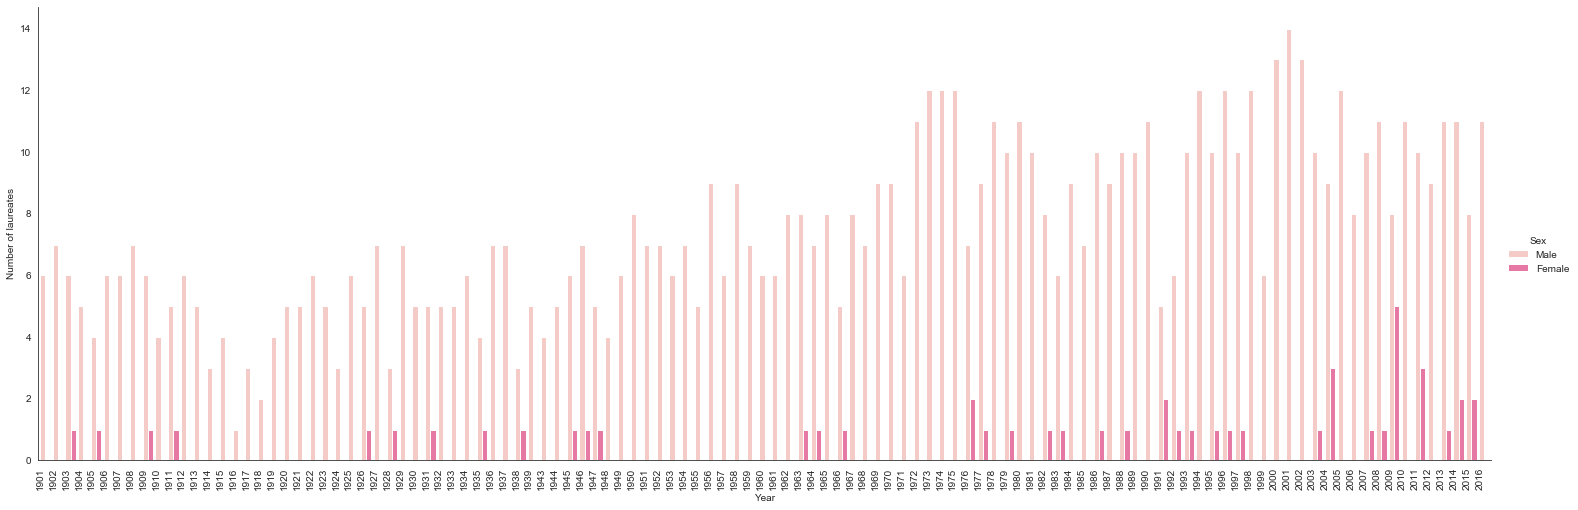

In [12]:
sns.set_style("white")
sns.set_palette(sns.color_palette("RdPu", 3))
ax = sns.catplot(x="Year",y='Count', hue="Sex", kind="bar", data=sex, height = 7, aspect = 3)
ax.set(ylabel = "Number of laureates")
plt.xticks(rotation=90, horizontalalignment='right')

Text(0.5, -0.3, '(B)')

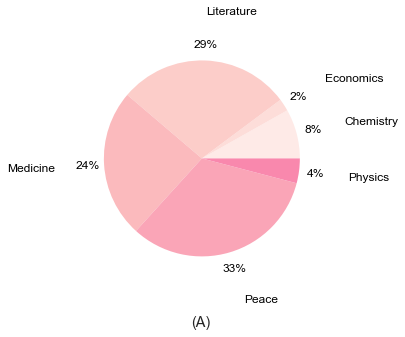

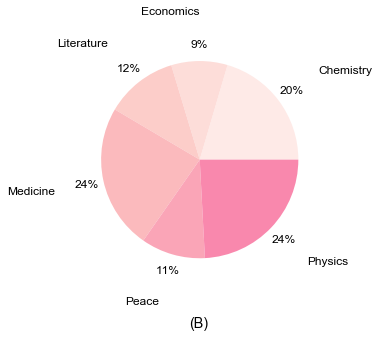

In [16]:
cat = nobel
fcat = cat.loc[cat['Sex']=='Female'].groupby(['Category']).size().reset_index()
fcat.columns = ['Category','Count']
fcat['Count'] = fcat['Count'].apply(lambda x: ((x/fcat['Count'].sum())*100).round(2))

mcat = cat.loc[cat['Sex']=='Male'].groupby(['Category']).size().reset_index()
mcat.columns = ['Category','Count']
mcat['Count'] = mcat['Count'].apply(lambda x: ((x/mcat['Count'].sum())*100).round(2))

color_palette_list = sns.color_palette("RdPu", 13)
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=12

percentages = fcat.Count
ax.pie(percentages, labels=fcat.Category,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.17,labeldistance=1.5,
      wedgeprops = {'linewidth': 0})
ax.axis('equal')
plt.title('(A)', y = -0.3)

fig, ax = plt.subplots()
percentages = mcat.Count
ax.pie(percentages, labels = mcat.Category,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.17,labeldistance=1.5,
      wedgeprops = {'linewidth': 0})
ax.axis('equal')
plt.title('(B)', y = -0.3)

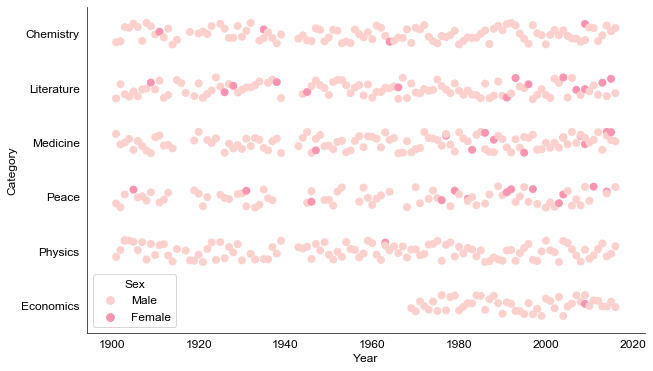

In [17]:
sexI = nobel.groupby(['Year','Category','Sex']).size().reset_index()
sexI.columns = ['Year','Category','Sex','Count']

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.set_palette(sns.color_palette("RdPu", 4))
ax = sns.stripplot(x = 'Year', y= 'Category', hue='Sex',jitter = 0.20, size = 8,data=sexI)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [18]:
city = nobel.dropna(subset=['Birth Country'])

In [19]:
#Transform the old country names (Prussia (Poland)-> Poland)
city.loc[city['Birth Country'].str.contains('\('),'Birth Country'] = city.loc[city['Birth Country'].str.contains('\(')]['Birth Country'].apply(lambda x: re.search(r'\((.*?)\)',x).group(1))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
city.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France


In [20]:
city_I = city.groupby(['Birth Country']).size().reset_index()
city_I.columns = ['Birth Country', 'Count']
city_I.sort_values(by = 'Count',ascending = False,inplace = True)
city_I.head(10)

,Birth Country,Count
74,United States of America,259
73,United Kingdom,85
24,Germany,80
23,France,54
67,Sweden,29
55,Poland,26
59,Russia,26
37,Japan,24
36,Italy,19
47,Netherlands,18


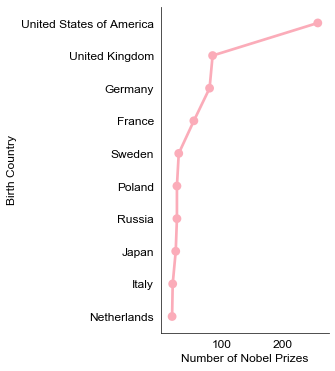

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (3, 6))
sns.set_palette(sns.color_palette("RdPu", 2))
ax = sns.pointplot(x="Count",y='Birth Country', data=city_I.head(10), height = 5)
ax.set(xlabel = "Number of Nobel Prizes")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [696]:
top10 = city_I['Birth Country'].head(10) 
city_y = city.groupby(['Year','Birth Country']).size().reset_index()
city_y.columns = ['Year','Birth Country', 'Count']
city_y = city_y.loc[city_y['Birth Country'].isin(top10)]
top10.reset_index()

,index,Birth Country
0,74,United States of America
1,73,United Kingdom
2,24,Germany
3,23,France
4,67,Sweden
5,55,Poland
6,59,Russia
7,37,Japan
8,36,Italy
9,47,Netherlands


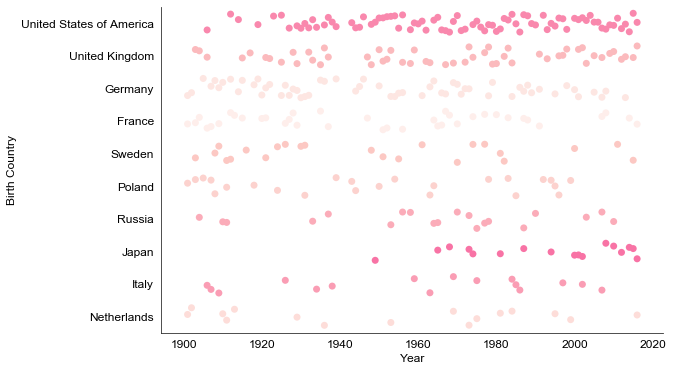

In [661]:
fig, ax = plt.subplots(1, 1, figsize = (9, 6))
sns.set_palette(sns.color_palette("RdPu", 20))
sns.stripplot(x = 'Year', y= 'Birth Country', hue='Birth Country',size = 7, jitter = 0.3,order=top10,data=city_y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text xticklabel objects>)

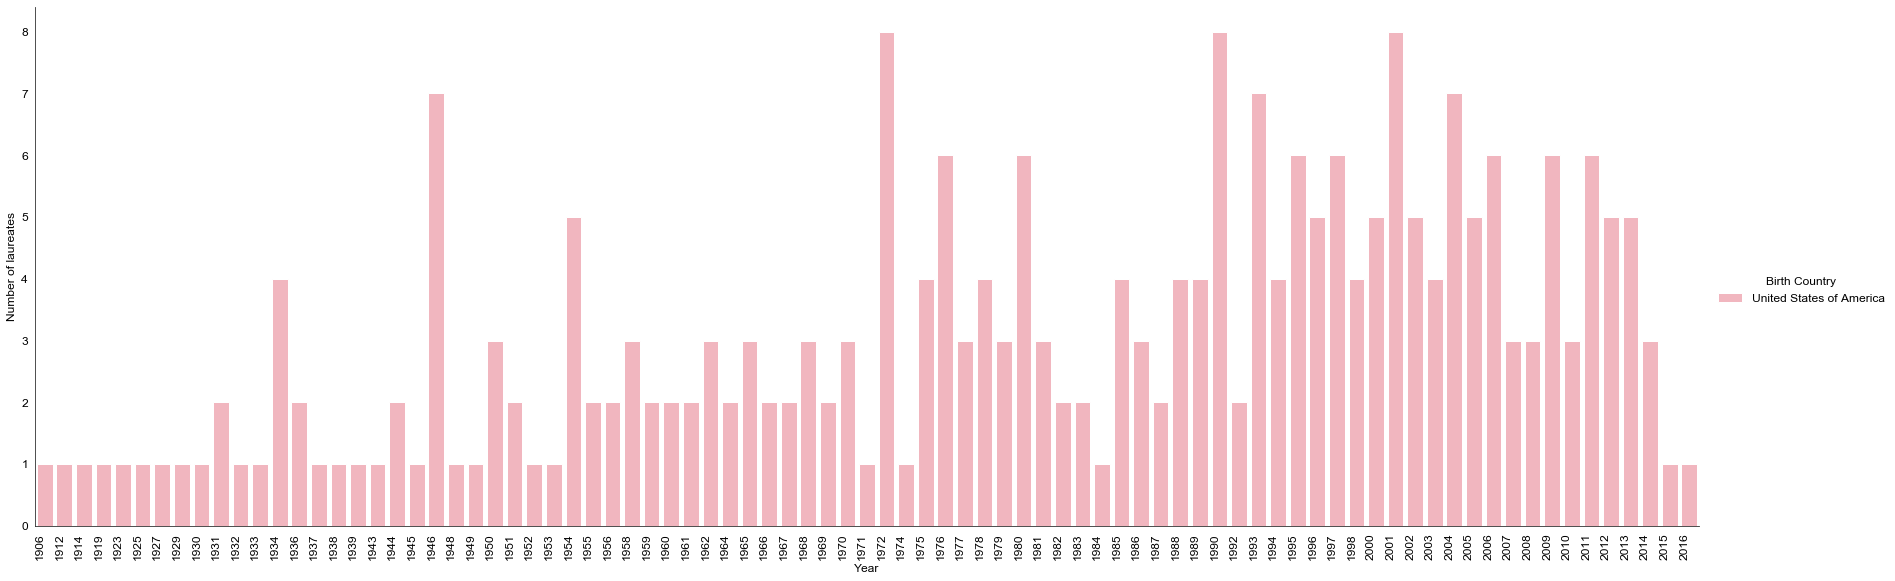

In [662]:
USA = nobel.loc[nobel['Birth Country'] == 'United States of America']
USA_group = USA.groupby(['Year','Birth Country']).size().reset_index()
USA_group.columns = ['Year','Birth Country', 'Count']

sns.set_palette(sns.color_palette("RdPu", 2))
ax = sns.catplot(x = 'Year', y= 'Count', hue='Birth Country',kind = 'bar',data=USA_group, height = 8, aspect = 3)
ax.set(ylabel = "Number of laureates")
plt.xticks(rotation=90, horizontalalignment='right')

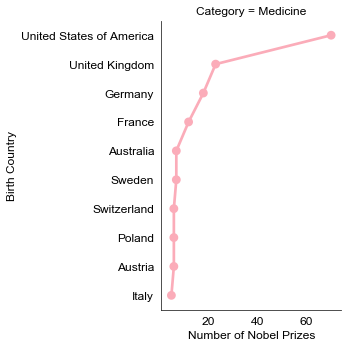

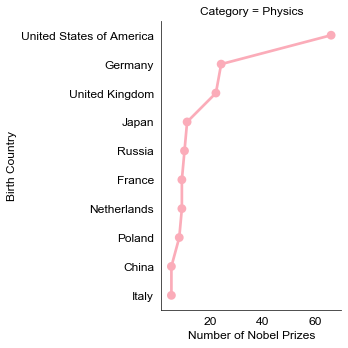

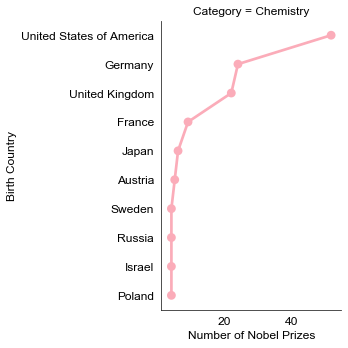

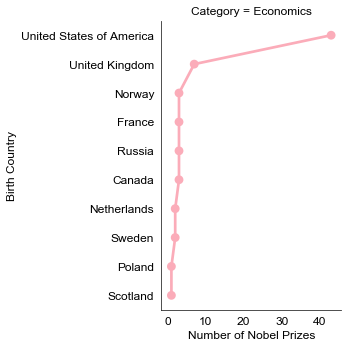

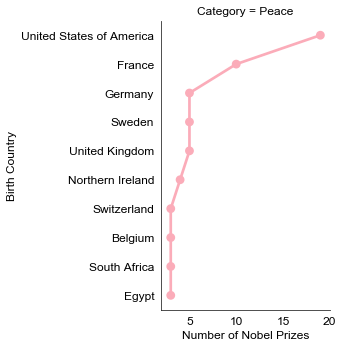

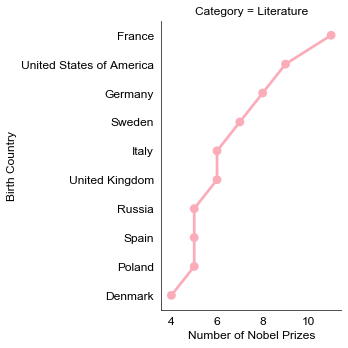

In [663]:
city_II = city.groupby(['Birth Country','Category']).size().reset_index()
city_II.columns = ['Birth Country','Category','Count']
city_II.sort_values(by = 'Count',ascending = False,inplace = True)
for rwr in list(city_II.Category.unique()):
    sns.set_palette(sns.color_palette("RdPu", 2))
    ax = sns.catplot(x="Count",y='Birth Country', kind="point", margin_titles = True, col = 'Category', data=city_II.loc[city_II['Category'] == rwr].head(10))
    ax.set(xlabel = "Number of Nobel Prizes")
    

In [666]:
counts = nobel.groupby(['Laureate ID', "Full Name"]).size().reset_index()
counts.columns =  ['Laureate ID', "Full Name", 'Count']
counts.sort_values(by = 'Count',ascending = False,inplace = True)
counts.head(5)

,Laureate ID,Full Name,Count
475,482,Comité international de la Croix Rouge (Intern...,3
64,66,John Bardeen,2
5,6,"Marie Curie, née Sklodowska",2
507,515,Office of the United Nations High Commissioner...,2
217,222,Frederick Sanger,2


In [638]:
#Multiple Nobel laureates
ind = counts.loc[counts['Count'] > 1, ['Laureate ID']].values
legends = nobel.loc[nobel['Laureate ID'].isin(list(ind))]
legends[['Year', 'Laureate Type','Prize', 'Full Name']]

,Year,Laureate Type,Prize,Full Name
19,1903,Individual,The Nobel Prize in Physics 1903,"Marie Curie, née Sklodowska"
63,1911,Individual,The Nobel Prize in Chemistry 1911,"Marie Curie, née Sklodowska"
90,1917,Organization,The Nobel Peace Prize 1917,Comité international de la Croix Rouge (Intern...
222,1944,Organization,The Nobel Peace Prize 1944,Comité international de la Croix Rouge (Intern...
289,1954,Individual,The Nobel Prize in Chemistry 1954,Linus Carl Pauling
295,1954,Organization,The Nobel Peace Prize 1954,Office of the United Nations High Commissioner...
312,1956,Individual,The Nobel Prize in Physics 1956,John Bardeen
320,1958,Individual,The Nobel Prize in Chemistry 1958,Frederick Sanger
357,1962,Individual,The Nobel Peace Prize 1962,Linus Carl Pauling
365,1963,Organization,The Nobel Peace Prize 1963,Comité international de la Croix Rouge (Intern...


In [681]:
nat = city
nat.loc[:,'Continent'] = nat.loc[:,'Birth Country']
city.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Continent
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany,Netherlands
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany,Poland
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France,France


In [671]:
#group by parts of the world
Europe =['Netherlands', 'France', 'Poland', 'Switzerland', 'Germany',
       'Sweden', 'Norway', 'Denmark', 'United Kingdom',
       'Scotland', 'Spain', 'Czech Republic', 'Slovakia',
       'Italy',
       'Luxembourg', 'Latvia', 'Belgium', 'Austria',
       'Slovenia', 'Ireland',
       'Hungary', 'Croatia', 'Finland', 'Portugal',
       'Iceland',
       'Bosnia and Herzegovina', 
       'Romania',
       'Northern Ireland', 'Lithuania', 'Greece',
       'Republic of Macedonia', 'Bulgaria',
       'Cyprus']
СIS = ['Russia','Azerbaijan','Ukraine','Belarus']
North = ['United States of America','Mexico','Canada','Saint Lucia']
South = ['Argentina','Chile','Guadeloupe Island', 'Brazil', 'Guatemala','Venezuela', 'Colombia','Costa Rica','Trinidad','Peru']
Asia = ['India','Indonesia','Japan','China', 'Turkey','Vietnam','Pakistan','Taiwan','South Korea',"People's Republic of China", 
       'Myanmar','Israel','East Timor', 'Iran','Bangladesh']
Africa = [ 'South Africa', 'Algeria','Zimbabwe','Egypt', 'Madagascar', 'Nigeria','Ghana', 'Kenya',  'Liberia', 'Yemen','Morocco']
Australia = ['Australia','New Zealand']

In [672]:
def nationalizer(t):
    if t in Europe:
        t = 'Europe'
    elif t in СIS:
        t = 'CIS Countries'
    elif t in North:
        t = 'North America'
    elif t in South:
        t = 'South America'
    elif t in Asia:
        t = 'Asia'
    elif t in Africa:
        t = 'Africa'
    elif t in Australia:
        t = 'Australia'
    return t
nationalizer('Russia')

'CIS Countries'

In [682]:
nat.loc[:,'Continent'] = nat['Continent'].apply(lambda x: nationalizer (x))

natI = nat.groupby(['Year','Continent']).size().reset_index()
natI.columns = ['Year','Continent','Count']

pivot_nat = natI.pivot_table('Count', index='Year',
                             columns = 'Continent', aggfunc=sum)
pivot_nat = pivot_nat.fillna(0)
pivot_nat.head()

Continent,Africa,Asia,Australia,CIS Countries,Europe,North America,South America
Year,,,,,,,
1901,0.0,0.0,0.0,0.0,6.0,0.0,0.0
1902,0.0,1.0,0.0,0.0,6.0,0.0,0.0
1903,0.0,0.0,0.0,0.0,7.0,0.0,0.0
1904,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1905,0.0,0.0,0.0,0.0,5.0,0.0,0.0


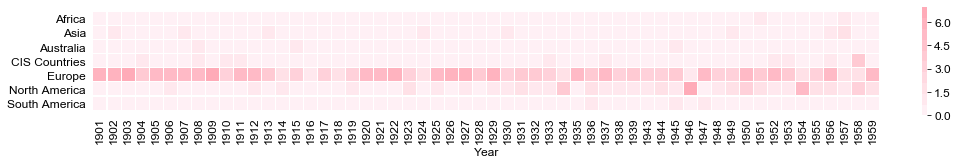

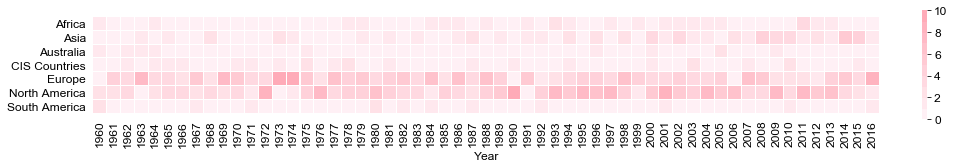

In [683]:
colors = ['lavenderblush', '#FFABB8'] # Experiment with this
cm = LinearSegmentedColormap.from_list('test', colors, N=10)

nI = pivot_nat[:56]
nII = pivot_nat[-57:]

fig, ax = plt.subplots(1, 1, figsize = (15, 2))
sns.heatmap(data=nI.T,
           square=True,
           cmap=cm,
           linewidths=0.01,
           cbar_kws={'fraction' : 0.01},
         )
ax.set_ylabel('')
ax.set_ylim(7,0)
fig, ax = plt.subplots(1, 1, figsize = (15, 2))
sns.heatmap(data=nII.T,
           square=True,
           cmap=cm,
           linewidths=0.01,
           cbar_kws={'fraction' : 0.01},
         )
ax.set_ylabel('')
ax.set_ylim(7,0)
plt.show()

In [24]:
age = city
age = age.dropna(subset=['Birth Date'])
age.loc[age['Birth Date'].str.contains('/'),['Birth Date']] = age.loc[age['Birth Date'].str.contains('/'),['Birth Date']].apply(lambda x: x['Birth Date'][-4:], axis = 1)
age.loc[age['Birth Date'].str.contains('-'),['Birth Date']] = age.loc[age['Birth Date'].str.contains('-'),['Birth Date']].apply(lambda x: x['Birth Date'][:-6], axis = 1)

In [26]:
age['Age'] = age['Year']
age.head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany,1901
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France,1901
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany,1901
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland,1901
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France,1901


In [27]:
age.loc[:,'Age'] = age.apply(lambda x: x['Age']- np.int(x['Birth Date']), axis = 1)
b = age['Age']
mean = np.int(b.mean())
interval = st.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=st.sem(b))
print ('Average age',mean)
print ('Confidence intervals',interval)

Average age 59
Confidence intervals (58.63404441922114, 60.27195784578453)


In [29]:
age.to_excel("Nobel.xlsx")

In [687]:
ageI = age.groupby(['Age']).size().reset_index()
ageI.columns = ['Age','Count']

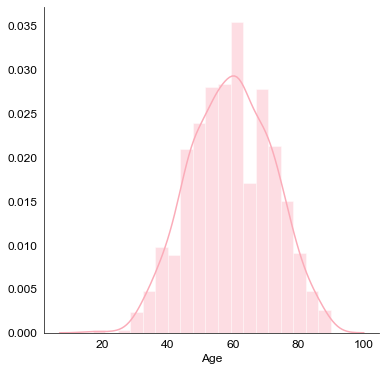

In [688]:
sns.set_palette(sns.color_palette("RdPu", 2))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax = sns.distplot(age['Age'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

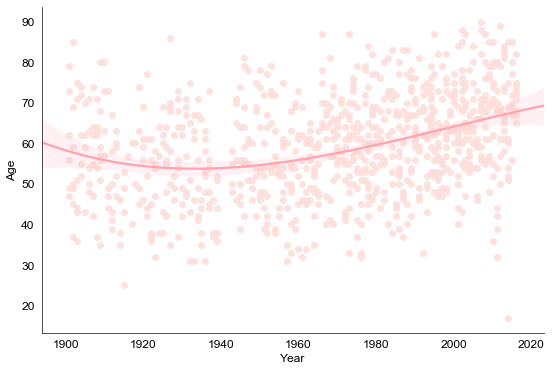

In [689]:
ageII = age.groupby(['Year','Age']).size().reset_index()
ageII.columns = ['Year','Age','Count']

sns.set_palette(sns.color_palette("RdPu", 6))
fig, ax = plt.subplots(1, 1, figsize = (9, 6))
ax = sns.regplot(x = 'Year', y = 'Age', data = ageII, order=3, line_kws={'color':'#FFA3B1'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

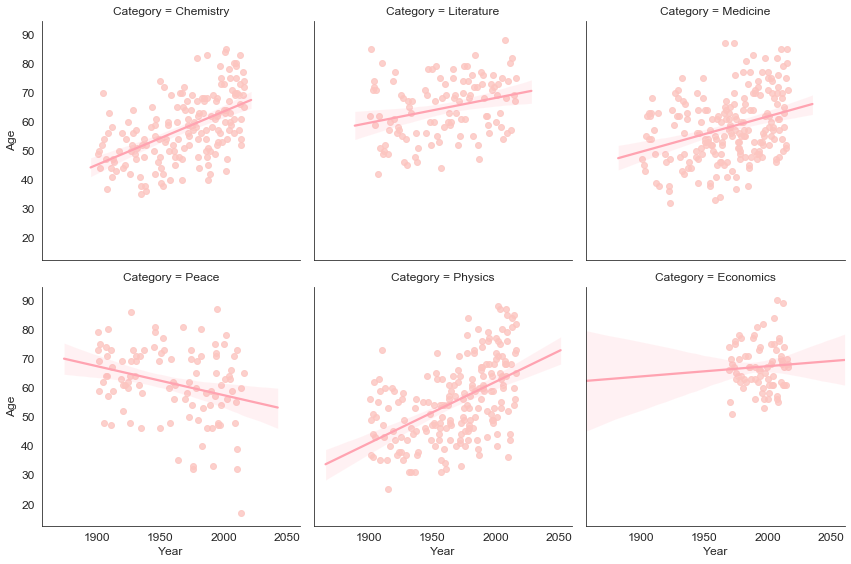

In [698]:
ageIII = age.groupby(['Year','Category','Age']).size().reset_index()
ageIII.columns = ['Year','Category','Age','Count']
g = sns.FacetGrid(ageIII, col="Category", col_wrap=3, height=4, aspect =1)
g.map(sns.regplot,'Year','Age', line_kws={'color':'#FFA3B1'})

In [691]:
for col in list(ageIII.Category.unique()):
    b = ageIII.loc[ageIII['Category'] == col, 'Age']
    mean = np.int(b.mean())
    interval = st.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=st.sem(b))
    print (col)
    print ('Average age',mean)
    print ('Confidence intervals',interval)

Chemistry
Average age 57
Confidence intervals (56.097331273832516, 59.54009562675228)
Literature
Average age 64
Confidence intervals (62.78875204983513, 66.63981937873628)
Medicine
Average age 57
Confidence intervals (56.38225563507664, 59.56920067560298)
Peace
Average age 61
Confidence intervals (58.86955515535454, 63.91890638310699)
Physics
Average age 55
Confidence intervals (53.46808106694157, 57.301918933058424)
Economics
Average age 67
Confidence intervals (65.36155193471348, 69.02805845489692)
